In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as md
import pandas as pd
from datetime import datetime
import copy
import allantools
import scipy as sp
plt.rc('font', size=26) #controls default text size
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 8

In [2]:
# напишу класс своего идеального датасета, который парсит мне данные. Я не вижу смысла выделять автоматически фрагменты

class GyroData:
    def __init__(self, gyroType='2', df=None) -> None:
        self.gyroType = gyroType
        self.df = df
    
    def getCols(self):
        if self.gyroType == '2':
            ux = np.array(self.df['Ux']) * 100 # in Hz
            drx = np.array(self.df['Drx'])
            omegax = np.array(self.df['Omegax'])
            return ux, drx, omegax
        if self.gyroType == '41':
            omeg1 = np.array(self.df[1])
            omeg2 = np.array(self.df[2])
            sums = np.array(self.df[3])
            diffs = np.array(self.df[4])
            pod1 = np.array(self.df[5])
            pod2 = np.array(self.df[6])
            diffped = np.array(self.df[7])
            magnet = np.array(self.df[8])
            magnetcorr = np.array(self.df[9])
            return omeg1, omeg2, sums, diffs, pod1, pod2, diffped, magnet, magnetcorr
        
        if self.gyroType == '42':
            omeg1 = np.array(self.df[1])
            omeg2 = np.array(self.df[2])
            sums = np.array(self.df[3])
            diffs = np.array(self.df[4])
            pod1 = np.array(self.df[5])
            pod2 = np.array(self.df[6])
            diffped = np.array(self.df[7])
            magnet = np.array(self.df[8])
            return omeg1, omeg2, sums, diffs, pod1, pod2, diffped, magnet
        else:
            print('not ready yet')
            return None
    
    def getSlice(self, low=0, up=None):
        if self.gyroType == '2':
            ux, drx, omegax = self.getCols()
            if up is None:
                up = len(ux)
            return ux[low:up], drx[low:up], omegax[low:up]
        else:
            print('not ready yet')
            return None
        
    def getMultipleSlices(self, lims, val):
        value = np.array(self.df[val])
        if val == 'Drx':
            value *= 100
        result = []
        for item in lims:
            result.append(value[item[0]:item[1]])
        return result
    
    def plotSlice(self, value, low=0, up=None, figsize=(10, 8), xlim=None, ylim=None):
        if self.gyroType == '2':
            ux, drx, omegax = self.getSlice(low, up)
            if value == 'Drx':
                val = drx
            if value == 'Ux':
                val = ux
            if value == 'Omegax':
                val = omegax
            fig, ax = plt.subplots(figsize=figsize)
            ax.plot(val, 'bo')
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            ax.set_xlabel('t, s')
            ax.set_ylabel(value)
            ax.grid(visible=True, which='both', axis='both')
            plt.tight_layout()

    def getAverage(self):
        if self.gyroType == '41':
            omeg1, omeg2, sums, diffs, pod1, pod2, diffped, magnet, magnetcorr = self.getCols()
            omeg1 = np.average(omeg1)
            omeg2 = np.average(omeg2)
            sums = np.average(sums)
            diffs = np.average(diffs)
            pod1 = np.average(pod1)
            pod2 = np.average(pod2)
            diffped = np.average(diffped)
            magnet = np.average(magnet)
            magnetcorr = np.average(magnetcorr)
            return omeg1, omeg2, sums, diffs, pod1, pod2, diffped, magnet, magnetcorr

        if self.gyroType == '42':
            omeg1, omeg2, sums, diffs, pod1, pod2, diffped, magnet = self.getCols()
            omeg1 = np.average(omeg1)
            omeg2 = np.average(omeg2)
            sums = np.average(sums)
            diffs = np.average(diffs)
            pod1 = np.average(pod1)
            pod2 = np.average(pod2)
            diffped = np.average(diffped)
            magnet = np.average(magnet)
            return omeg1, omeg2, sums, diffs, pod1, pod2, diffped, magnet

In [5]:
# Импорт данных
# Вариация Аллана

# df_4freq2_allan = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\12_06_2023\\test1.dat', sep='\s+', header=None)

#Работает компенсация
# Магнитная чувствительность, СРП=1465, 650 MHZ межмод
field_teslamet = np.array([0.27, 0.88, 1.55, 2.15, 2.27, 2.43, 2.96, 3.47, 4.03, 4.6, 5.1, 5.33, 5.66, 5.88])*10
df_4freq2_1 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file1', sep='\s+', header=None)
df_4freq2_2 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file2', sep='\s+', header=None)
df_4freq2_3 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file3', sep='\s+', header=None)
df_4freq2_4 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file4', sep='\s+', header=None)
df_4freq2_5 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file12', sep='\s+', header=None)
df_4freq2_6 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file5', sep='\s+', header=None)
df_4freq2_7 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file6', sep='\s+', header=None)
df_4freq2_8 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file7', sep='\s+', header=None)
df_4freq2_9 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file8', sep='\s+', header=None)
df_4freq2_10 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file9', sep='\s+', header=None)
df_4freq2_11 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file10', sep='\s+', header=None)
df_4freq2_12 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file13', sep='\s+', header=None)
df_4freq2_13 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file11', sep='\s+', header=None)
df_4freq2_14 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file14', sep='\s+', header=None)

omeg1_1465comp = np.zeros(len(field_teslamet))
omeg2_1465comp = np.zeros(len(field_teslamet))
sums_1465comp = np.zeros(len(field_teslamet))
diffs_1465comp = np.zeros(len(field_teslamet))
pod1_1465comp = np.zeros(len(field_teslamet))
pod2_1465comp = np.zeros(len(field_teslamet))
i = 0
for item in [df_4freq2_1, df_4freq2_2, df_4freq2_3, df_4freq2_4, df_4freq2_5, df_4freq2_6, df_4freq2_7, df_4freq2_8, df_4freq2_9, df_4freq2_10, df_4freq2_11, df_4freq2_12, df_4freq2_13, df_4freq2_14]:
    lasobj = GyroData(gyroType='41', df=item.iloc[70:item.shape[0] - 30])
    i1, i2, i3, i4, i5, i6, i7, i8, i9 = lasobj.getAverage()
    omeg1_1465comp[i] = i1
    omeg2_1465comp[i] = i2
    sums_1465comp[i] = i3
    diffs_1465comp[i] = i4
    pod1_1465comp[i] = i5
    pod2_1465comp[i] = i6
    i+=1

# Магнитная чувствительность, СРП=2900, 650 MHZ межмод
field_teslamet2 = np.array([0.27, 0.93, 1.65, 1.9, 2.23, 2.45, 2.99, 3.49, 4.04, 4.6, 5.14, 5.35, 5.93, 6.29])*10
df_4freq2_15 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file15', sep='\s+', header=None)
df_4freq2_16 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file16', sep='\s+', header=None)
df_4freq2_17 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file17', sep='\s+', header=None)
df_4freq2_18 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file18', sep='\s+', header=None)
df_4freq2_19 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file19', sep='\s+', header=None)
df_4freq2_20 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file20', sep='\s+', header=None)
df_4freq2_21 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file21', sep='\s+', header=None)
df_4freq2_22 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file22', sep='\s+', header=None)
df_4freq2_23 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file23', sep='\s+', header=None)
df_4freq2_24 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file24', sep='\s+', header=None)
df_4freq2_25 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file25', sep='\s+', header=None)
df_4freq2_26 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file26', sep='\s+', header=None)
df_4freq2_27 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file29', sep='\s+', header=None)
df_4freq2_28 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file30', sep='\s+', header=None)

omeg1_2900comp = np.zeros(len(field_teslamet2))
omeg2_2900comp = np.zeros(len(field_teslamet2))
sums_2900comp = np.zeros(len(field_teslamet2))
diffs_2900comp = np.zeros(len(field_teslamet2))
pod1_2900comp = np.zeros(len(field_teslamet2))
pod2_2900comp = np.zeros(len(field_teslamet2))
i = 0
for item in [df_4freq2_15, df_4freq2_16, df_4freq2_17, df_4freq2_18, df_4freq2_19, df_4freq2_20, df_4freq2_21, df_4freq2_22, df_4freq2_23, df_4freq2_24, df_4freq2_25, df_4freq2_26, df_4freq2_27, df_4freq2_28]:
    lasobj = GyroData(gyroType='41', df=item.iloc[75:item.shape[0] - 30])
    i1, i2, i3, i4, i5, i6, i7, i8, i9 = lasobj.getAverage()
    omeg1_2900comp[i] = i1
    omeg2_2900comp[i] = i2
    sums_2900comp[i] = i3
    diffs_2900comp[i] = i4
    pod1_2900comp[i] = i5
    pod2_2900comp[i] = i6
    i+=1

# Магнитная чувствительность, СРП = 630
field_teslamet3 = np.array([0.27, 0.96, 1.63, 1.9, 2.28, 2.47, 3.08, 3.52, 4.07, 4.64, 5.16, 5.38, 5.48, 5.69, 5.91])*10
df_4freq2_31 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file31', sep='\s+', header=None)
df_4freq2_32 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file32', sep='\s+', header=None)
df_4freq2_33 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file33', sep='\s+', header=None)
df_4freq2_34 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file34', sep='\s+', header=None)
df_4freq2_35 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file35', sep='\s+', header=None)
df_4freq2_36 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file36', sep='\s+', header=None)
df_4freq2_37 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file37', sep='\s+', header=None)
df_4freq2_38 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file38', sep='\s+', header=None)
df_4freq2_39 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file39', sep='\s+', header=None)
df_4freq2_40 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file40', sep='\s+', header=None)
df_4freq2_41 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file41', sep='\s+', header=None)
df_4freq2_42 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file42', sep='\s+', header=None)
df_4freq2_43 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file43', sep='\s+', header=None)
df_4freq2_44 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file44', sep='\s+', header=None)
df_4freq2_45 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file45', sep='\s+', header=None)

omeg1_630comp = np.zeros(len(field_teslamet3))
omeg2_630comp = np.zeros(len(field_teslamet3))
sums_630comp = np.zeros(len(field_teslamet3))
diffs_630comp = np.zeros(len(field_teslamet3))
pod1_630comp = np.zeros(len(field_teslamet3))
pod2_630comp = np.zeros(len(field_teslamet3))
i = 0
for item in [df_4freq2_31, df_4freq2_32, df_4freq2_33, df_4freq2_34, df_4freq2_35, df_4freq2_36, df_4freq2_37, df_4freq2_38, df_4freq2_39, df_4freq2_40, df_4freq2_41, df_4freq2_42, df_4freq2_43, df_4freq2_44, df_4freq2_45]:
    lasobj = GyroData(gyroType='41', df=item.iloc[20:item.shape[0] - 30])
    i1, i2, i3, i4, i5, i6, i7, i8, i9 = lasobj.getAverage()
    omeg1_630comp[i] = i1
    omeg2_630comp[i] = i2
    sums_630comp[i] = i3
    diffs_630comp[i] = i4
    pod1_630comp[i] = i5
    pod2_630comp[i] = i6
    i+=1

# Выключаем магнитную чувствительность
# Магнитная чувствительность, СРП = 630
field_teslamet4 = np.array([0.28, 0.93, 1.65, 1.9, 2.28, 2.48, 3.02, 3.53, 4.07, 4.63, 5.16, 5.37, 5.7, 6.24, 6.8])*10
df_4freq2_46 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file46', sep='\s+', header=None)
df_4freq2_47 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file47', sep='\s+', header=None)
df_4freq2_48 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file48', sep='\s+', header=None)
df_4freq2_49 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file49', sep='\s+', header=None)
df_4freq2_50 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_file50', sep='\s+', header=None)
df_4freq2_51 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed51', sep='\s+', header=None)
df_4freq2_52 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed52', sep='\s+', header=None)
df_4freq2_53 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed53', sep='\s+', header=None)
df_4freq2_54 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed54', sep='\s+', header=None)
df_4freq2_55 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed55', sep='\s+', header=None)
df_4freq2_56 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed56', sep='\s+', header=None)
df_4freq2_57 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed57', sep='\s+', header=None)
df_4freq2_58 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed58', sep='\s+', header=None)
df_4freq2_59 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed59', sep='\s+', header=None)
df_4freq2_60 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed60', sep='\s+', header=None)

omeg1_630nocomp = np.zeros(len(field_teslamet4))
omeg2_630nocomp = np.zeros(len(field_teslamet4))
sums_630nocomp = np.zeros(len(field_teslamet4))
diffs_630nocomp = np.zeros(len(field_teslamet4))
pod1_630nocomp = np.zeros(len(field_teslamet4))
pod2_630nocomp = np.zeros(len(field_teslamet4))
i = 0
for item in [df_4freq2_46, df_4freq2_47, df_4freq2_48, df_4freq2_49, df_4freq2_50, df_4freq2_51, df_4freq2_52, df_4freq2_53, df_4freq2_54, df_4freq2_55, df_4freq2_56, df_4freq2_57, df_4freq2_58, df_4freq2_59, df_4freq2_60]:
    lasobj = GyroData(gyroType='42', df=item)
    i1, i2, i3, i4, i5, i6, i7, i8 = lasobj.getAverage()
    omeg1_630nocomp[i] = i1
    omeg2_630nocomp[i] = i2
    sums_630nocomp[i] = i3
    diffs_630nocomp[i] = i4
    pod1_630nocomp[i] = i5
    pod2_630nocomp[i] = i6
    i+=1

# Магнитная чувствительность, СРП = 2880
field_teslamet5 = np.array([0.27, 0.96, 1.51, 1.92, 2.33, 2.99, 3.53, 4.08, 4.65, 5.14, 5.69, 6.28, 6.67])*10
df_4freq2_61 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed61', sep='\s+', header=None)
df_4freq2_62 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed62', sep='\s+', header=None)
df_4freq2_63 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed63', sep='\s+', header=None)
df_4freq2_64 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed64', sep='\s+', header=None)
df_4freq2_65 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed65', sep='\s+', header=None)
df_4freq2_66 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed66', sep='\s+', header=None)
df_4freq2_67 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed67', sep='\s+', header=None)
df_4freq2_68 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed68', sep='\s+', header=None)
df_4freq2_69 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed69', sep='\s+', header=None)
df_4freq2_70 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed70', sep='\s+', header=None)
df_4freq2_71 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed71', sep='\s+', header=None)
df_4freq2_72 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed72', sep='\s+', header=None)
df_4freq2_73 = pd.read_csv('https://raw.githubusercontent.com/Peaguin/2023-gyroscopes/main/15_06_2023/4freq2_filed73', sep='\s+', header=None)

omeg1_2880nocomp = np.zeros(len(field_teslamet5))
omeg2_2880nocomp = np.zeros(len(field_teslamet5))
sums_2880nocomp = np.zeros(len(field_teslamet5))
diffs_2880nocomp = np.zeros(len(field_teslamet5))
pod1_2880nocomp = np.zeros(len(field_teslamet5))
pod2_2880nocomp = np.zeros(len(field_teslamet5))
i = 0
for item in [df_4freq2_61, df_4freq2_62, df_4freq2_63, df_4freq2_64, df_4freq2_65, df_4freq2_66, df_4freq2_67, df_4freq2_68, df_4freq2_69, df_4freq2_70, df_4freq2_71, df_4freq2_72, df_4freq2_73]:
    lasobj = GyroData(gyroType='42', df=item)
    i1, i2, i3, i4, i5, i6, i7, i8 = lasobj.getAverage()
    omeg1_2880nocomp[i] = i1
    omeg2_2880nocomp[i] = i2
    sums_2880nocomp[i] = i3
    diffs_2880nocomp[i] = i4
    pod1_2880nocomp[i] = i5
    pod2_2880nocomp[i] = i6
    i+=1

In [7]:
def linear(x, a, b):
    return a * x + b

(array([-5.0311311 , -2.06031435]),
 array([ 5.02045318, -2.10545785]),
 array([-0.01067793, -4.16577198]),
 array([0.04834354, 1.97889025]),
 array([0.04822292, 1.97395282]),
 array([0.00076918, 0.03148535]))

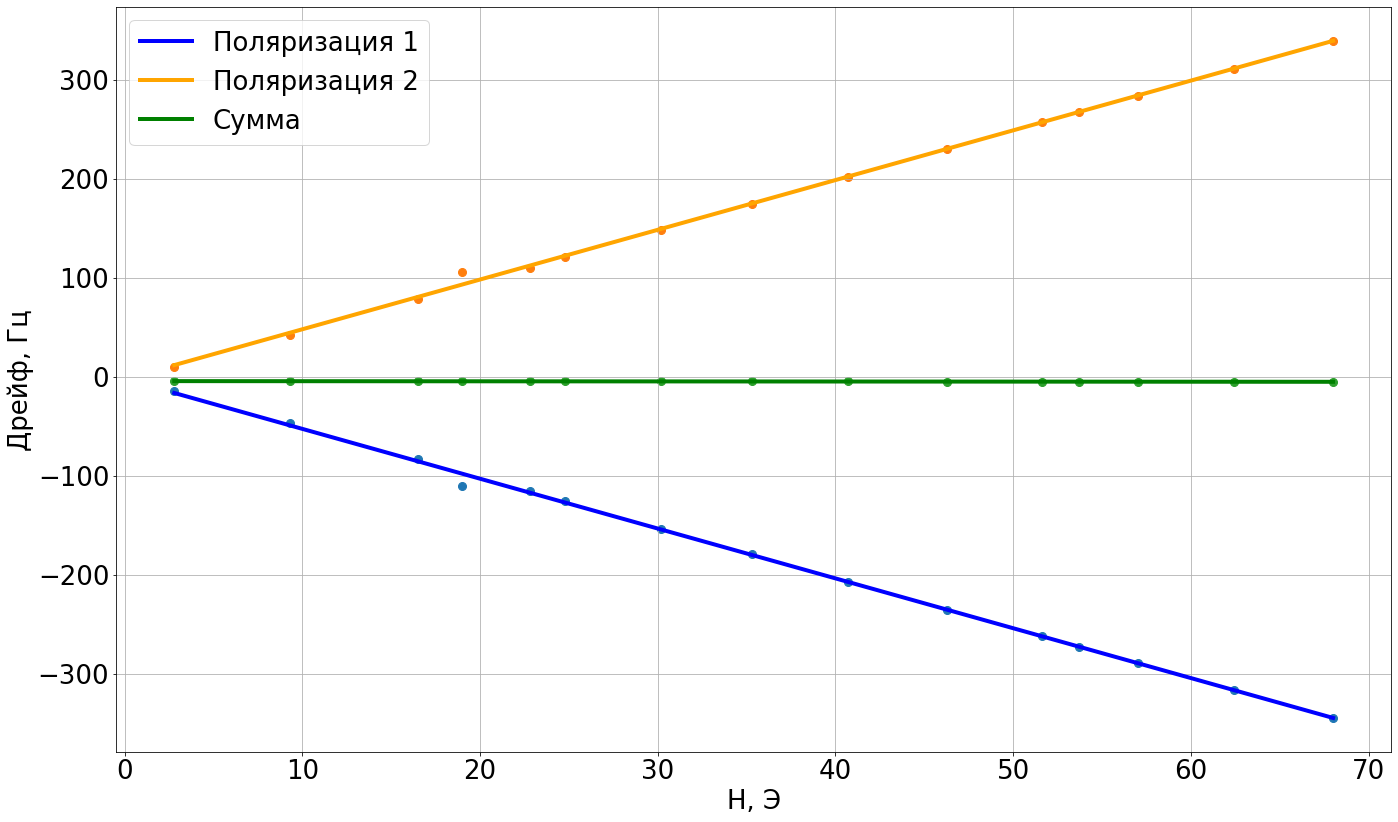

In [8]:

# Мода СРП 640, без компенсации
fig, ax = plt.subplots(figsize=(20, 12))

popt_nocomp1, perr_nocomp1 = sp.optimize.curve_fit(linear, field_teslamet4, omeg1_630nocomp)
popt_nocomp2, perr_nocomp2 = sp.optimize.curve_fit(linear, field_teslamet4, omeg2_630nocomp)
popt_nocomp3, perr_nocomp3 = sp.optimize.curve_fit(linear, field_teslamet4, sums_630nocomp)
ax.scatter(field_teslamet4, omeg1_630nocomp)
ax.plot(field_teslamet4, popt_nocomp1[0]*field_teslamet4 + popt_nocomp1[1], color='blue', label = 'Поляризация 1')
ax.scatter(field_teslamet4, omeg2_630nocomp)
ax.plot(field_teslamet4, popt_nocomp2[0]*field_teslamet4 + popt_nocomp2[1], color='orange', label='Поляризация 2')
ax.scatter(field_teslamet4, sums_630nocomp)
ax.plot(field_teslamet4, popt_nocomp3[0]*field_teslamet4 + popt_nocomp3[1], color='green', label = 'Сумма')

ax.grid(visible=True, which='both', axis='both')
ax.set_ylabel('Дрейф, Гц')
ax.set_xlabel('H, Э')
ax.legend()
plt.tight_layout()

popt_nocomp1, popt_nocomp2, popt_nocomp3, np.sqrt(np.diag(perr_nocomp1)), np.sqrt(np.diag(perr_nocomp2)), np.sqrt(np.diag(perr_nocomp3))


(array([-5.42154668,  5.82499851]),
 array([ 5.42566837, -1.03681831]),
 array([4.12168512e-03, 4.78818019e+00]),
 array([0.02159919, 0.87794126]),
 array([0.02189506, 0.88996723]),
 array([0.00076599, 0.03113532]))

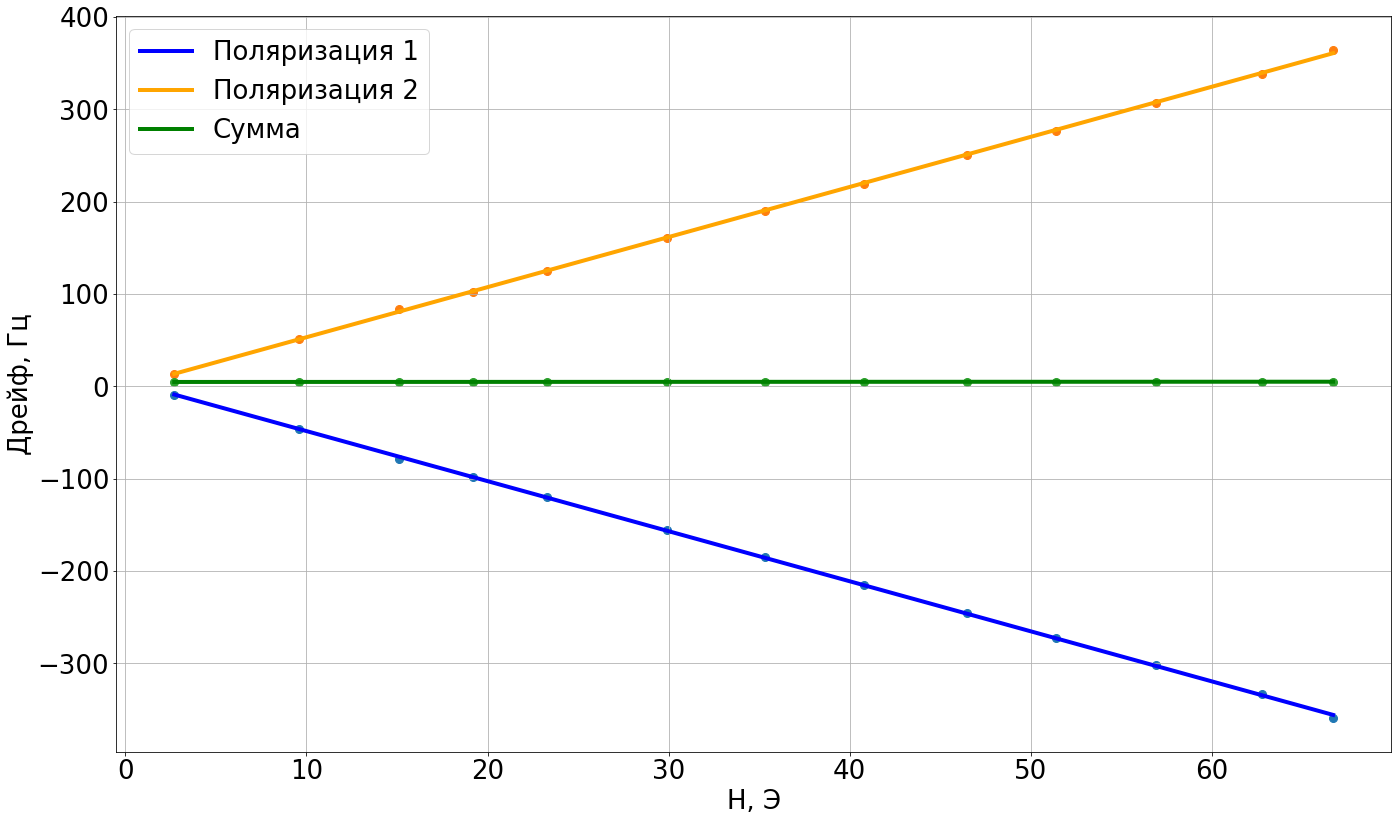

In [9]:
# Мода СРП 2880, без компенсации
fig, ax = plt.subplots(figsize=(20, 12))

popt_nocomp1, perr_nocomp1 = sp.optimize.curve_fit(linear, field_teslamet5, omeg1_2880nocomp)
popt_nocomp2, perr_nocomp2 = sp.optimize.curve_fit(linear, field_teslamet5, omeg2_2880nocomp)
popt_nocomp3, perr_nocomp3 = sp.optimize.curve_fit(linear, field_teslamet5, sums_2880nocomp)
ax.scatter(field_teslamet5, omeg1_2880nocomp)
ax.plot(field_teslamet5, popt_nocomp1[0]*field_teslamet5 + popt_nocomp1[1], color='blue', label = 'Поляризация 1')
ax.scatter(field_teslamet5, omeg2_2880nocomp)
ax.plot(field_teslamet5, popt_nocomp2[0]*field_teslamet5 + popt_nocomp2[1], color='orange', label='Поляризация 2')
ax.scatter(field_teslamet5, sums_2880nocomp)
ax.plot(field_teslamet5, popt_nocomp3[0]*field_teslamet5 + popt_nocomp3[1], color='green', label = 'Сумма')

ax.grid(visible=True, which='both', axis='both')
ax.set_ylabel('Дрейф, Гц')
ax.set_xlabel('H, Э')
ax.legend()
plt.tight_layout()

popt_nocomp1, popt_nocomp2, popt_nocomp3, np.sqrt(np.diag(perr_nocomp1)), np.sqrt(np.diag(perr_nocomp2)), np.sqrt(np.diag(perr_nocomp3))


(array([-1.59935685e-03,  2.34932506e+00]),
 array([0.01374777, 2.12136381]),
 array([0.01214841, 4.4706889 ]),
 array([0.00376191, 0.10447932]),
 array([0.00343543, 0.09541199]),
 array([0.00341702, 0.09490068]))

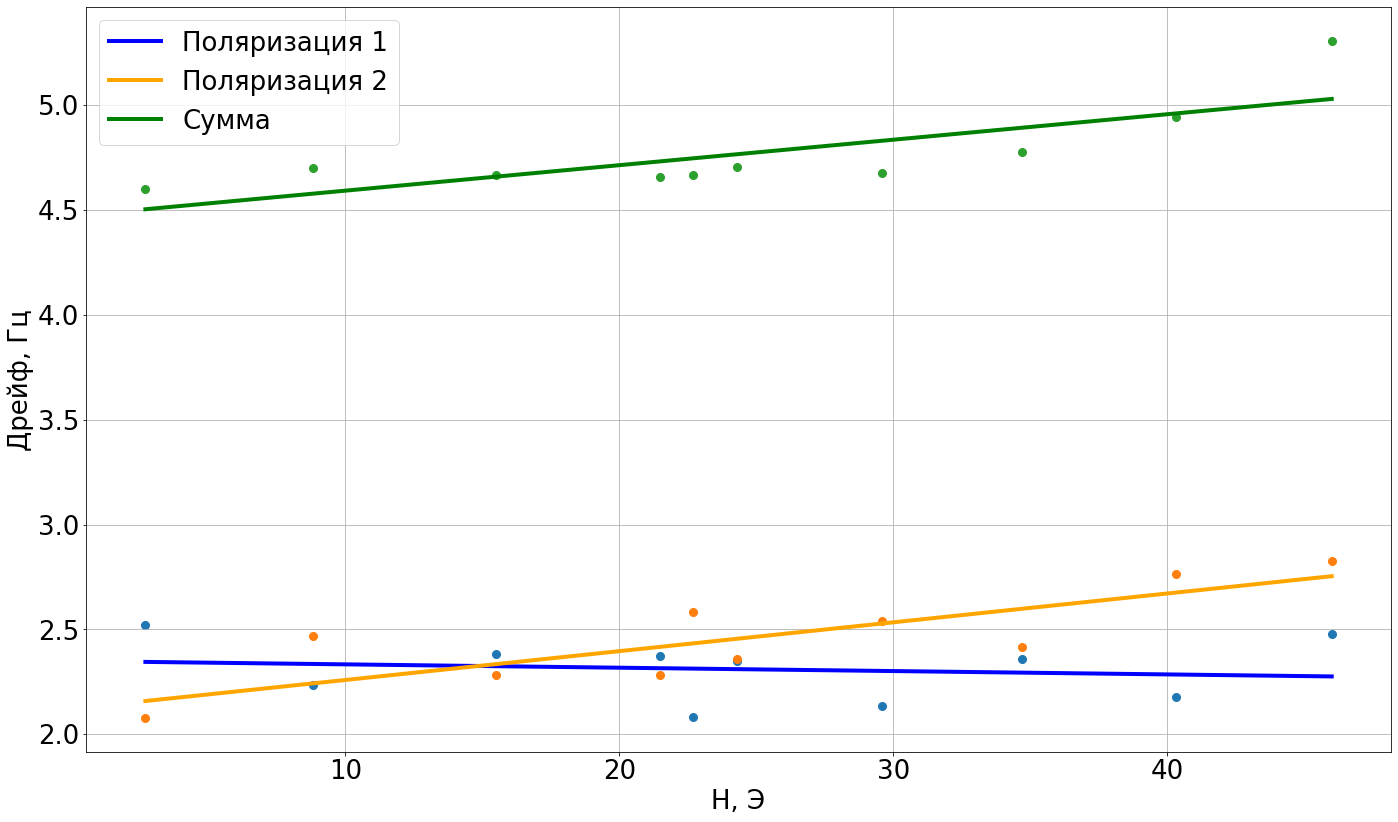

In [10]:
# Мода СРП 1465, c компенсацией
fig, ax = plt.subplots(figsize=(20, 12))

popt_nocomp1, perr_nocomp1 = sp.optimize.curve_fit(linear, field_teslamet[:10], omeg1_1465comp[:10])
popt_nocomp2, perr_nocomp2 = sp.optimize.curve_fit(linear, field_teslamet[:10], omeg2_1465comp[:10])
popt_nocomp3, perr_nocomp3 = sp.optimize.curve_fit(linear, field_teslamet[:10], sums_1465comp[:10])
ax.scatter(field_teslamet[:10], omeg1_1465comp[:10])
ax.plot(field_teslamet[:10], popt_nocomp1[0]*field_teslamet[:10] + popt_nocomp1[1], color='blue', label = 'Поляризация 1')
ax.scatter(field_teslamet[:10], omeg2_1465comp[:10])
ax.plot(field_teslamet[:10], popt_nocomp2[0]*field_teslamet[:10] + popt_nocomp2[1], color='orange', label='Поляризация 2')
ax.scatter(field_teslamet[:10], sums_1465comp[:10])
ax.plot(field_teslamet[:10], popt_nocomp3[0]*field_teslamet[:10] + popt_nocomp3[1], color='green', label = 'Сумма')
ax.grid(visible=True, which='both', axis='both')
ax.set_ylabel('Дрейф, Гц')
ax.set_xlabel('H, Э')
ax.legend()
plt.tight_layout()

popt_nocomp1, popt_nocomp2, popt_nocomp3, np.sqrt(np.diag(perr_nocomp1)), np.sqrt(np.diag(perr_nocomp2)), np.sqrt(np.diag(perr_nocomp3))


(array([0.00201093, 1.84299186]),
 array([5.56882849e-04, 1.89013427e+00]),
 array([2.56781037e-03, 3.73312610e+00]),
 array([0.00471496, 0.13070508]),
 array([0.00630695, 0.17483749]),
 array([0.01053117, 0.29193867]))

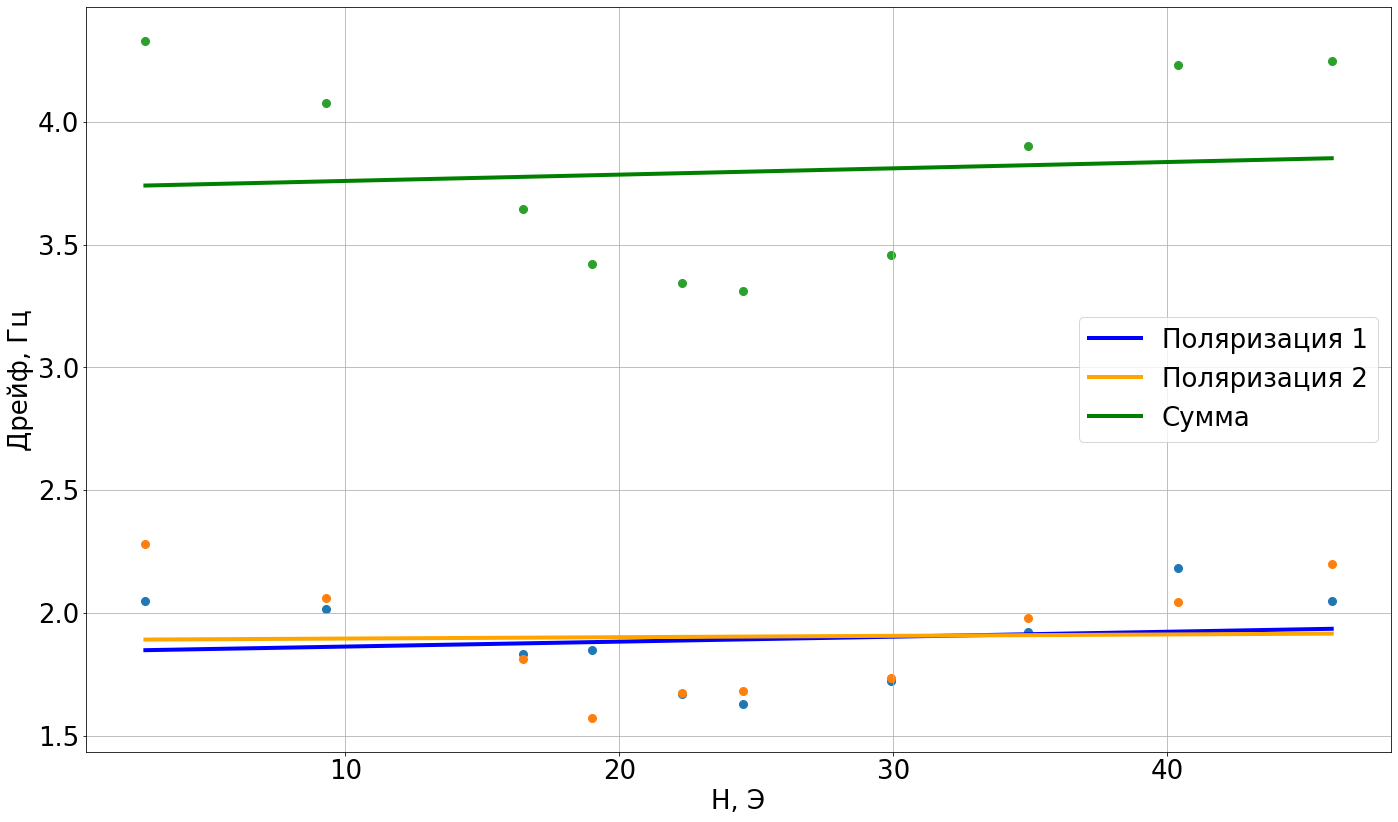

In [12]:
# Мода СРП 2900, c компенсацией
fig, ax = plt.subplots(figsize=(20, 12))

popt_nocomp1, perr_nocomp1 = sp.optimize.curve_fit(linear, field_teslamet2[:10], omeg1_2900comp[:10])
popt_nocomp2, perr_nocomp2 = sp.optimize.curve_fit(linear, field_teslamet2[:10], omeg2_2900comp[:10])
popt_nocomp3, perr_nocomp3 = sp.optimize.curve_fit(linear, field_teslamet2[:10], omeg1_2900comp[:10]+omeg2_2900comp[:10])
ax.scatter(field_teslamet2[:10], omeg1_2900comp[:10])
ax.plot(field_teslamet2[:10], popt_nocomp1[0]*field_teslamet2[:10] + popt_nocomp1[1], color='blue', label = 'Поляризация 1')
ax.scatter(field_teslamet2[:10], omeg2_2900comp[:10])
ax.plot(field_teslamet2[:10], popt_nocomp2[0]*field_teslamet2[:10] + popt_nocomp2[1], color='orange', label='Поляризация 2')
ax.scatter(field_teslamet2[:10], sums_2900comp[:10])
ax.plot(field_teslamet2[:10], popt_nocomp3[0]*field_teslamet2[:10] + popt_nocomp3[1], color='green', label = 'Сумма')

ax.grid(visible=True, which='both', axis='both')
ax.set_ylabel('Дрейф, Гц')
ax.set_xlabel('H, Э')
ax.legend(loc=7)
plt.tight_layout()

popt_nocomp1, popt_nocomp2, popt_nocomp3, np.sqrt(np.diag(perr_nocomp1)), np.sqrt(np.diag(perr_nocomp2)), np.sqrt(np.diag(perr_nocomp3))


(array([-3.18542716e-04, -2.21580853e+00]),
 array([ 2.10641729e-04, -1.97590366e+00]),
 array([-1.07904848e-04, -4.19171211e+00]),
 array([0.00413451, 0.11562418]),
 array([0.00418688, 0.11708865]),
 array([0.00103734, 0.02900971]))

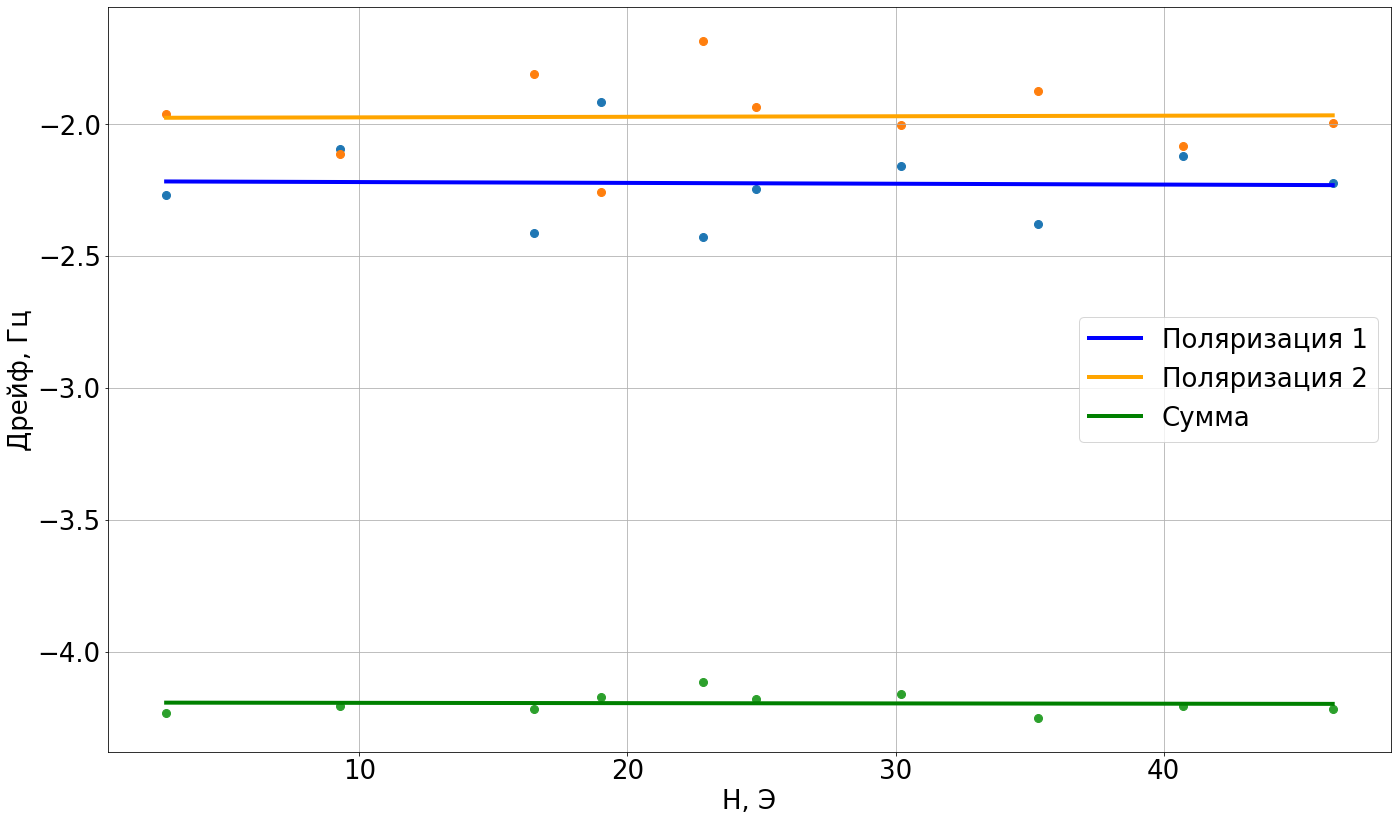

In [13]:
# Мода СРП 630, c компенсацией
fig, ax = plt.subplots(figsize=(20, 12))

popt_nocomp1, perr_nocomp1 = sp.optimize.curve_fit(linear, field_teslamet4[:10], omeg1_630comp[:10])
popt_nocomp2, perr_nocomp2 = sp.optimize.curve_fit(linear, field_teslamet4[:10], omeg2_630comp[:10])
popt_nocomp3, perr_nocomp3 = sp.optimize.curve_fit(linear, field_teslamet4[:10], omeg1_630comp[:10]+omeg2_630comp[:10])
ax.scatter(field_teslamet4[:10], omeg1_630comp[:10])
ax.plot(field_teslamet4[:10], popt_nocomp1[0]*field_teslamet4[:10] + popt_nocomp1[1], color='blue', label = 'Поляризация 1')
ax.scatter(field_teslamet4[:10], omeg2_630comp[:10])
ax.plot(field_teslamet4[:10], popt_nocomp2[0]*field_teslamet4[:10] + popt_nocomp2[1], color='orange', label='Поляризация 2')
ax.scatter(field_teslamet4[:10], sums_630comp[:10])
ax.plot(field_teslamet4[:10], popt_nocomp3[0]*field_teslamet4[:10] + popt_nocomp3[1], color='green', label = 'Сумма')

ax.grid(visible=True, which='both', axis='both')
ax.set_ylabel('Дрейф, Гц')
ax.set_xlabel('H, Э')
ax.legend(loc=7)
plt.tight_layout()

popt_nocomp1, popt_nocomp2, popt_nocomp3, np.sqrt(np.diag(perr_nocomp1)), np.sqrt(np.diag(perr_nocomp2)), np.sqrt(np.diag(perr_nocomp3))


In [ ]:
# Магнитная чувствительность, СРП = 1400
#df_4freq2_field2a =pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_allan', sep='\s+', header=None)
field_teslamet1400 = np.array([0.8, 0.18, 1.5, 2.18, 2.9, 3.45, 4.01, 4.59, 5.1, 5.63, 6.2, 6.73, 7.63, 8.55])*10

df_4freq2_62 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_2', sep='\s+', header=None)
df_4freq2_63 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_3', sep='\s+', header=None)
df_4freq2_64 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_4', sep='\s+', header=None)
df_4freq2_65 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_5', sep='\s+', header=None)
df_4freq2_66 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_6', sep='\s+', header=None)
df_4freq2_67 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_7', sep='\s+', header=None)
df_4freq2_68 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_8', sep='\s+', header=None)
df_4freq2_69 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_9', sep='\s+', header=None)
df_4freq2_70 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_10', sep='\s+', header=None)
df_4freq2_71 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_11', sep='\s+', header=None)
df_4freq2_72 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_12', sep='\s+', header=None)
df_4freq2_73 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_13', sep='\s+', header=None)
df_4freq2_74 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_14', sep='\s+', header=None)
df_4freq2_75 = pd.read_csv('C:\\Users\\deagu\\Desktop\\gyro4\\16_06_2023\\4freq2_filed2_15', sep='\s+', header=None)

omeg1_2880nocomp = np.zeros(len(field_teslamet1400))
omeg2_2880nocomp = np.zeros(len(field_teslamet1400))
sums_2880nocomp = np.zeros(len(field_teslamet1400))
diffs_2880nocomp = np.zeros(len(field_teslamet1400))
pod1_2880nocomp = np.zeros(len(field_teslamet1400))
pod2_2880nocomp = np.zeros(len(field_teslamet1400))
i = 0
for item in [df_4freq2_62, df_4freq2_63, df_4freq2_64, df_4freq2_65, df_4freq2_66, df_4freq2_67, df_4freq2_68, df_4freq2_69, df_4freq2_70, df_4freq2_71, df_4freq2_72, df_4freq2_73, df_4freq2_74, df_4freq2_75]:
    lasobj = GyroData(gyroType='42', df=item.iloc[20:item.shape[0] - 30])
    i1, i2, i3, i4, i5, i6, i7, i8 = lasobj.getAverage()
    omeg1_2880nocomp[i] = i1
    omeg2_2880nocomp[i] = i2
    sums_2880nocomp[i] = i3
    diffs_2880nocomp[i] = i4
    pod1_2880nocomp[i] = i5
    pod2_2880nocomp[i] = i6
    i+=1

(array([ -5.32776467, -31.02319134]),
 array([ 5.33239268, 35.48963238]),
 array([0.00462801, 4.46644124]),
 array([0.10433441, 5.53089053]),
 array([0.10474431, 5.55262028]),
 array([0.00083192, 0.04410085]))

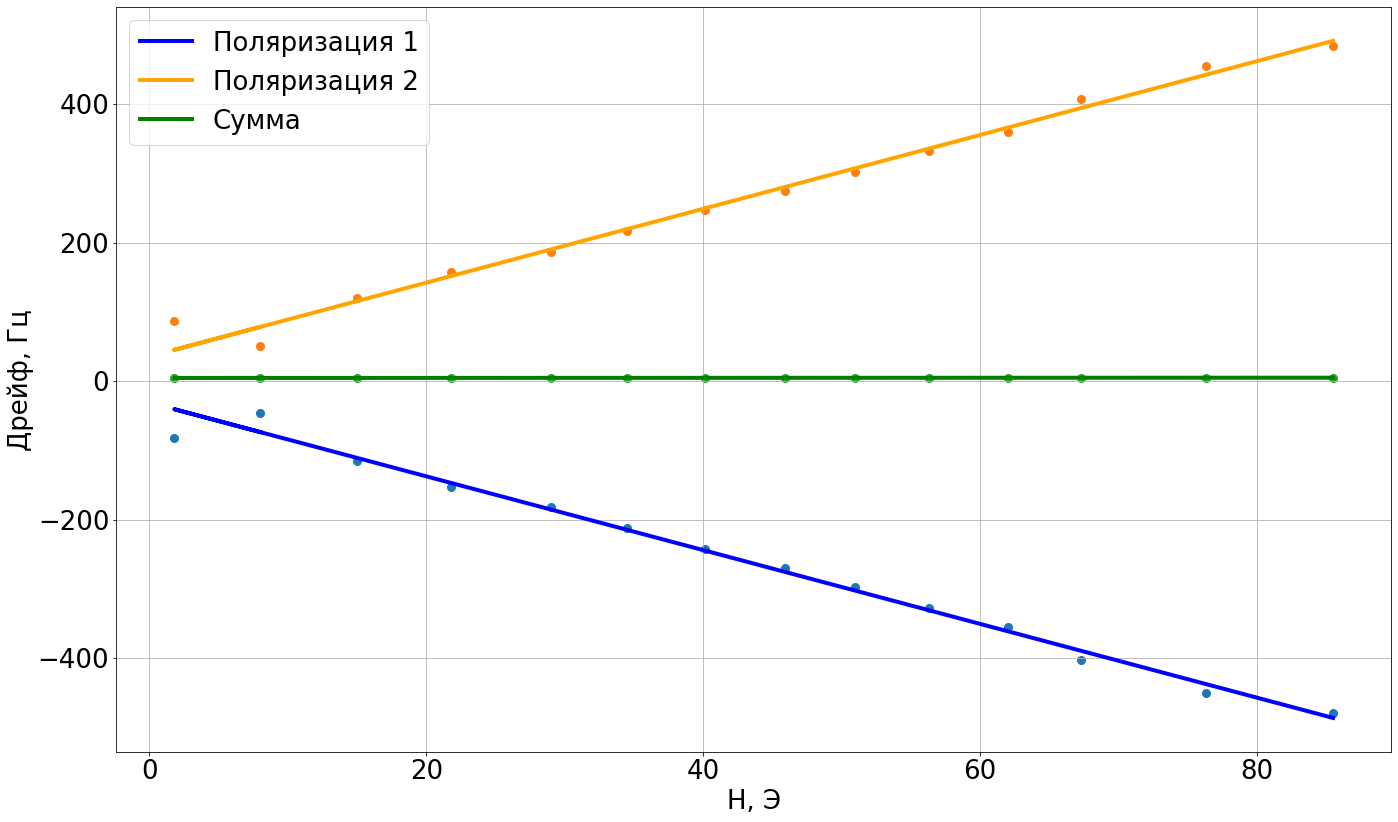

In [ ]:
# Мода СРП 2880, без компенсации
fig, ax = plt.subplots(figsize=(20, 12))

popt_nocomp1, perr_nocomp1 = sp.optimize.curve_fit(linear, field_teslamet1400[2:], omeg1_2880nocomp[2:])
popt_nocomp2, perr_nocomp2 = sp.optimize.curve_fit(linear, field_teslamet1400[2:], omeg2_2880nocomp[2:])
popt_nocomp3, perr_nocomp3 = sp.optimize.curve_fit(linear, field_teslamet1400[2:], sums_2880nocomp[2:])
ax.scatter(field_teslamet1400, omeg1_2880nocomp)
ax.plot(field_teslamet1400, popt_nocomp1[0]*field_teslamet1400 + popt_nocomp1[1], color='blue', label = 'Поляризация 1')
ax.scatter(field_teslamet1400, omeg2_2880nocomp)
ax.plot(field_teslamet1400, popt_nocomp2[0]*field_teslamet1400 + popt_nocomp2[1], color='orange', label='Поляризация 2')
ax.scatter(field_teslamet1400, sums_2880nocomp)
ax.plot(field_teslamet1400, popt_nocomp3[0]*field_teslamet1400 + popt_nocomp3[1], color='green', label = 'Сумма')

ax.grid(visible=True, which='both', axis='both')
ax.set_ylabel('Дрейф, Гц')
ax.set_xlabel('H, Э')
ax.legend(loc=2)
plt.tight_layout()

popt_nocomp1, popt_nocomp2, popt_nocomp3, np.sqrt(np.diag(perr_nocomp1)), np.sqrt(np.diag(perr_nocomp2)), np.sqrt(np.diag(perr_nocomp3))
